# Project Clustering with K-means 
ใช้ Dataset seeds จาก Kaggle แต่ Ref. เป็นของ UCI : link https://archive.ics.uci.edu/ml/datasets/seeds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'seeds_dataset.csv'

## Preparing Data
ทำการลบ col ID ออกเนื่องจากไม่ได้ใช้ <br>
ตรวจเช็คข้อมูลว่ามี Missing Values หรือไหม และดูรายละเอียดข้อมูล


In [3]:
df = pd.read_csv(path)
df = df.drop(columns='ID') #Drop id เพราะไม่ได้ใช้จากก dataset
df.sample(15)

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
157,12.13,13.73,0.8081,5.394,2.745,4.825,5.220,2
122,16.17,15.38,0.8588,5.762,3.387,4.286,5.703,1
87,18.98,16.66,0.8590,6.549,3.670,3.691,6.498,1
103,19.18,16.63,0.8717,6.369,3.681,3.357,6.229,1
105,18.83,16.29,0.8917,6.037,3.786,2.553,5.879,1
52,14.49,14.61,0.8538,5.715,3.113,4.116,5.396,0
124,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1
42,13.16,13.55,0.9009,5.138,3.201,2.461,4.783,0
143,12.22,13.32,0.8652,5.224,2.967,5.469,5.221,2
144,11.82,13.40,0.8274,5.314,2.777,4.471,5.178,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   lengthOfKernel        210 non-null    float64
 4   widthOfKernel         210 non-null    float64
 5   asymmetryCoefficient  210 non-null    float64
 6   lengthOfKernelGroove  210 non-null    float64
 7   seedType              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
df.describe(include = "all")

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [6]:
df.isnull().sum()

area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

In [7]:
df['seedType'].value_counts()

2    70
1    70
0    70
Name: seedType, dtype: int64

#### ทำการ Normalize Data เพื่อเปรียบเทียบ Model
การ Normalize ในที่นี้ทำเพื่อให้ข้อมูลอยู่ในสเกลเดียวกัน <br>

In [8]:
#from sklearn.preprocessing import StandardScaler

#standard_df = StandardScaler().fit_transform(df)
#standard_df.shape

In [9]:
normalized_df=(df.iloc[:, 0:7]-df.iloc[:, 0:7].mean())/df.iloc[:, 0:7].std()

#normalized_df=(df.iloc[:, 0:7]-df.iloc[:, 0:7].min())/(df.iloc[:, 0:7].max()-df.iloc[:, 0:7].min()) #Min-Max normalizatio
normalized_df['seedType'] = df.iloc[:, -1]
normalized_df

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,0.141759,0.214949,0.000060,0.303493,0.141364,-0.983801,-0.382663,0
1,0.011161,0.008204,0.427494,-0.168223,0.196962,-1.783904,-0.919816,0
2,-0.191609,-0.359342,1.438945,-0.761817,0.207552,-0.665888,-1.186357,0
3,-0.346264,-0.474200,1.036904,-0.687336,0.318747,-0.958528,-1.227051,0
4,0.444196,0.329807,1.371233,0.066507,0.803240,-1.559768,-0.474223,0
...,...,...,...,...,...,...,...,...
205,-0.913333,-1.040834,0.308997,-1.109397,-0.734959,-0.046025,-1.094797,2
206,-1.243264,-1.285864,-0.842110,-1.102626,-1.227395,0.415547,-0.824186,2
207,-0.566218,-0.688602,0.732199,-0.885953,-0.070436,3.069254,-0.716349,2
208,-1.033620,-1.033176,-0.799790,-1.023631,-1.118847,-0.067973,-0.740765,2


## Data Exploration
ทำการสำรวจข้อมูลด้วยการใช้ Pairplot เพื่อดูความสัมพันธ์ของข้อมูล <br>
เนื่องด้วยจากกราฟอาจจะดูยากเลยใช้ตัว Function .corr() เข้ามาช่วยเพื่อดูความสัมพันธ์ของข้อมูลอีกเช่นกัน

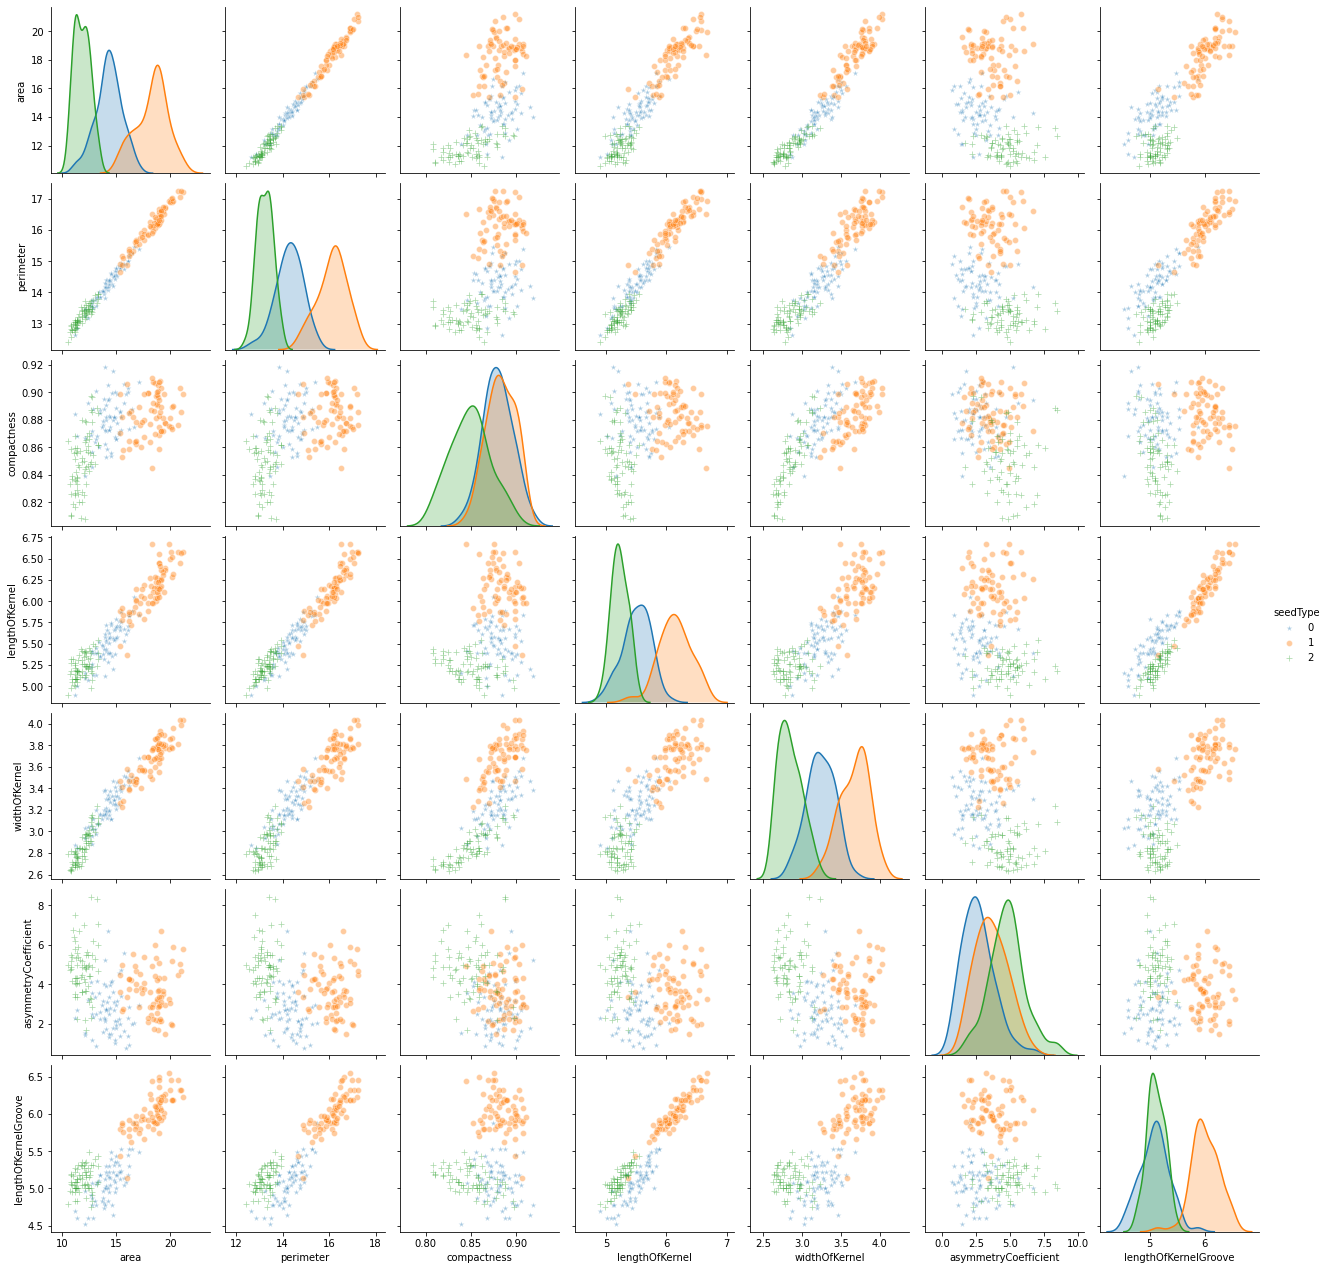

In [10]:
sns.pairplot(df, vars=['area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel',
                   'asymmetryCoefficient', 'lengthOfKernelGroove'],
                    hue='seedType',
                    markers=['*', 'o', '+'],
                    plot_kws={'alpha': 0.4})

In [11]:
df.corr()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
lengthOfKernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
widthOfKernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetryCoefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
lengthOfKernelGroove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
seedType,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


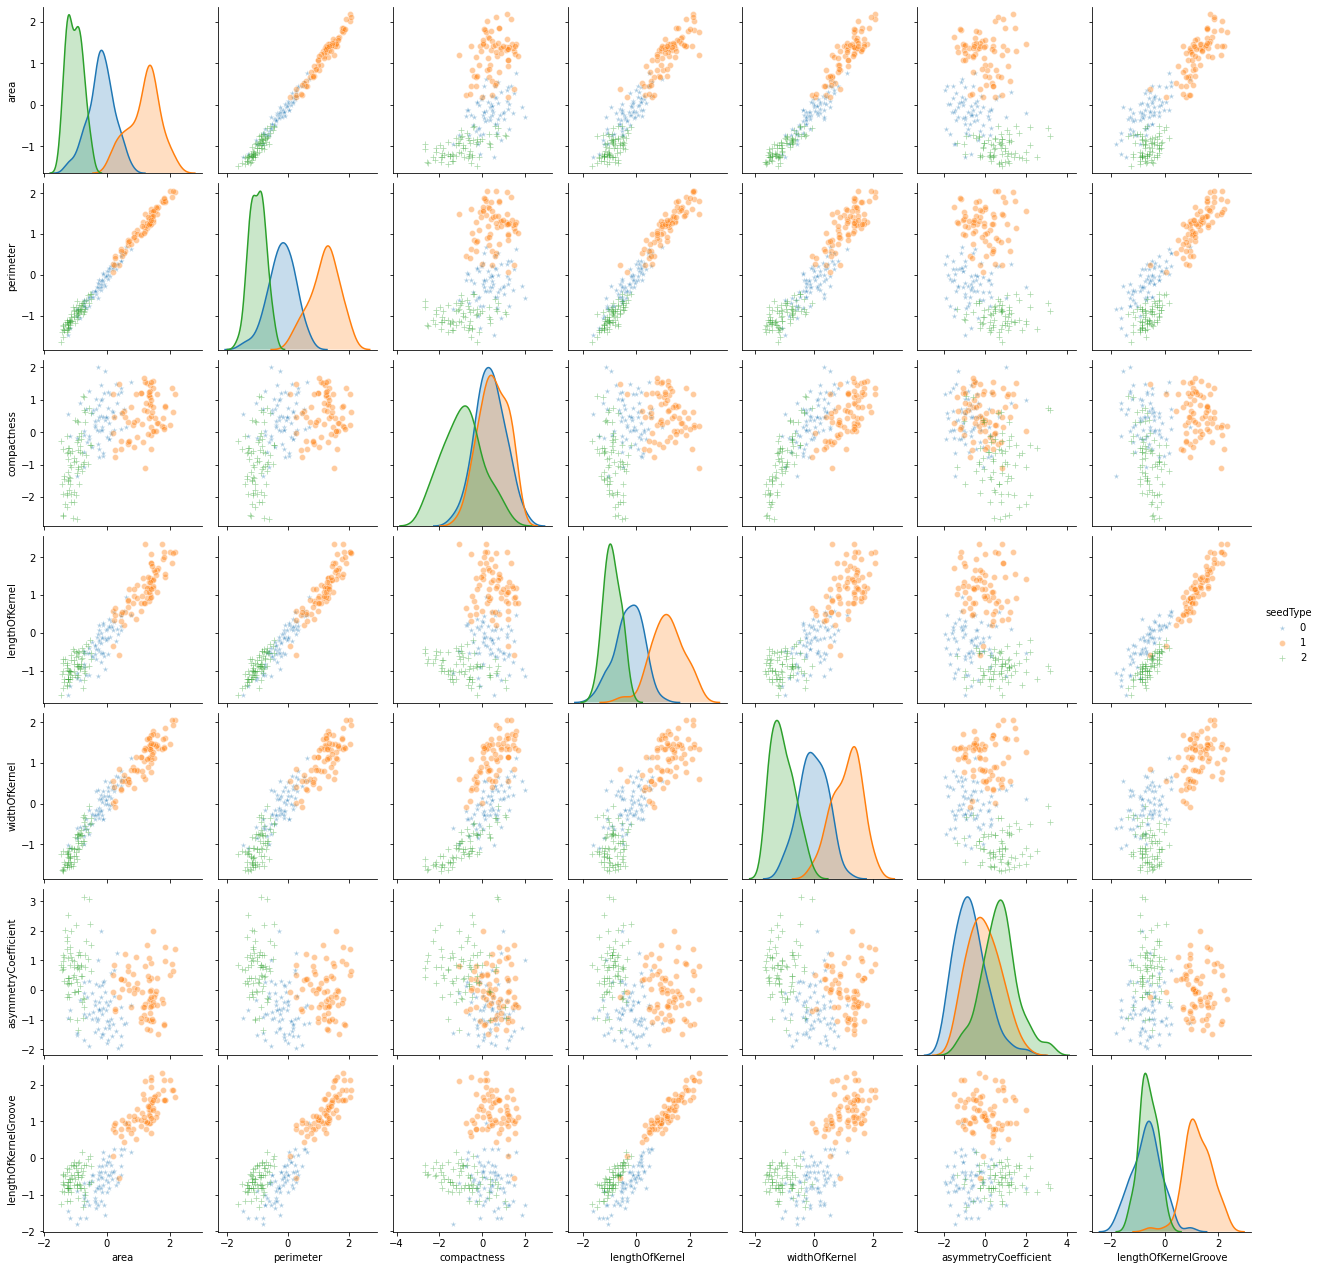

In [12]:
sns.pairplot(normalized_df, vars=['area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel',
                   'asymmetryCoefficient', 'lengthOfKernelGroove'],
                    hue='seedType',
                    markers=['*', 'o', '+'],
                    plot_kws={'alpha': 0.4})

In [13]:
normalized_df.corr()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
lengthOfKernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
widthOfKernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetryCoefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
lengthOfKernelGroove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
seedType,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


## Modeling 
เนื่องจากเราไม่รู้่าค่า K เท่าไหร่ที่ควรใช้ในโมเดลจึงแก้ปัญหาด้วย Elbow Method เพื่อที่จะหา K ที่เหมาะสมในการ Clustering <br>


In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

In [15]:
model = KMeans()

In [16]:
features = df.iloc[:, 0:7]

In [17]:
target = df.iloc[:, -1]

ทำการสร้างโมเดลที่ยังไม่กำหนดขึ้นมาแล้ว fit กับ features ที่เรามี แล้วหาค่า K <br>
Elbow method คือวิธีการวัด Error ของผลรวมของระยะห่างระหว่าง Object กับ Within-Cluster-Sum-of-Squares <br>
จุดที่เหมาะสมของจำนวน Clusters คือจุดที่กราฟมีลักษณะ "หัก" ที่สุด จึงสามารถหาได้จากระยะทางที่ไกลที่สุด นับจากเส้นตรงระหว่างสองจุดกับเส้นโค้ง

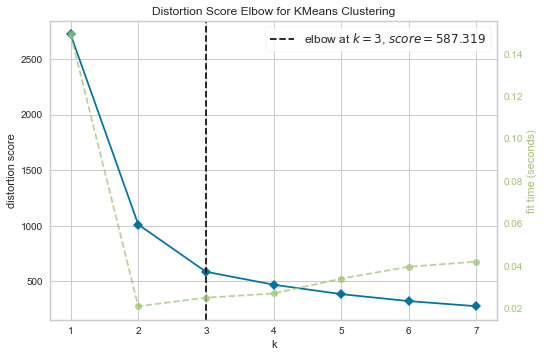

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(features)
#visualizer.poof()
visualizer.show()

In [47]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

cluster_labels = kmeans.fit_predict(features)

In [48]:
kmeans.cluster_centers_

array([[14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

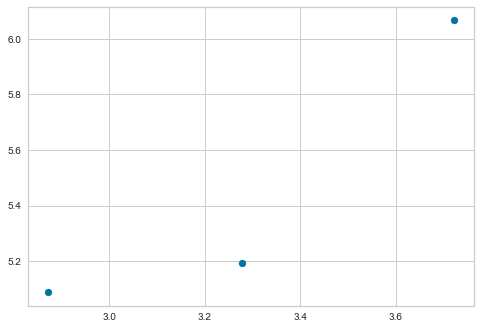

In [49]:
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 6])

Text(0.5, 1.0, 'Clustering Class of seedType')

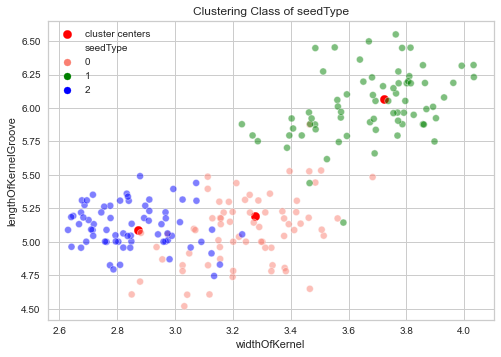

In [50]:
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 6], c='red', marker='o', s=70, label='cluster centers')
#plt.legend(loc=4)
sns.scatterplot(data=df, x='widthOfKernel', y='lengthOfKernelGroove', 
                hue='seedType', alpha=0.5, palette = ['salmon', 'green', 'blue'])
plt.title('Clustering Class of seedType')

In [51]:
df['seedType'].value_counts()

2    70
1    70
0    70
Name: seedType, dtype: int64

In [52]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
df['seedType'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cm = confusion_matrix(target, cluster_labels)

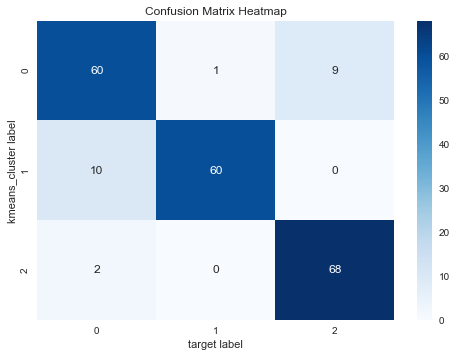

In [56]:
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Heatmap')
plt.xlabel("target label")
plt.ylabel("kmeans_cluster label")
plt.show()

In [57]:
df['Cluster'] = cluster_labels

In [58]:
pd.crosstab(df['seedType'], df['Cluster'])

Cluster,0,1,2
seedType,,,
0,60,1,9
1,10,60,0
2,2,0,68


In [59]:
def f(dat, c='red'):
    return [f'background-color: {c}' for i in dat]

In [60]:
df.style.apply(f, axis=0, subset=['Cluster'])

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType,Cluster
0,15.260000,14.840000,0.871000,5.763000,3.312000,2.221000,5.220000,0,0
1,14.880000,14.570000,0.881100,5.554000,3.333000,1.018000,4.956000,0,0
2,14.290000,14.090000,0.905000,5.291000,3.337000,2.699000,4.825000,0,0
3,13.840000,13.940000,0.895500,5.324000,3.379000,2.259000,4.805000,0,0
4,16.140000,14.990000,0.903400,5.658000,3.562000,1.355000,5.175000,0,0
5,14.380000,14.210000,0.895100,5.386000,3.312000,2.462000,4.956000,0,0
6,14.690000,14.490000,0.879900,5.563000,3.259000,3.586000,5.219000,0,0
7,14.110000,14.100000,0.891100,5.420000,3.302000,2.700000,5.000000,0,0
8,16.630000,15.460000,0.874700,6.053000,3.465000,2.040000,5.877000,0,0
9,16.440000,15.250000,0.888000,5.884000,3.505000,1.969000,5.533000,0,0


### สร้างตัวแบบจากข้อมูลที่ Normalize มาแล้ว

In [33]:
model2 = KMeans()

features_nor = normalized_df.iloc[:, 0:7]
target_nor = normalized_df.iloc[:, -1] 

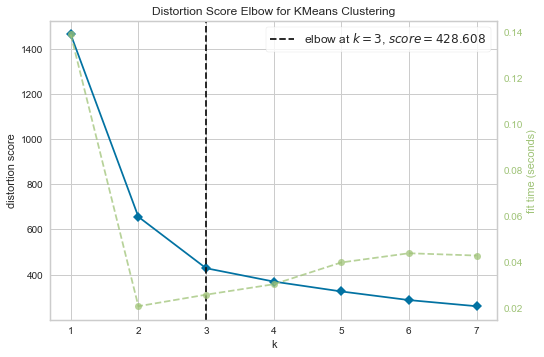

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
visualizer = KElbowVisualizer(model2, k=(1,8))
visualizer.fit(features_nor)
visualizer.poof()
#visualizer.show()

In [88]:
kmeans_nor = KMeans(n_clusters=3)
kmeans_nor.fit(features_nor)

cluster_labels_nor = kmeans_nor.fit_predict(features_nor)

In [89]:
kmeans_nor.cluster_centers_

array([[-0.14078309, -0.16963724,  0.44853463, -0.25719987,  0.00164301,
        -0.66034079, -0.58449646],
       [ 1.25368596,  1.25895795,  0.55912833,  1.23493193,  1.1620751 ,
        -0.04511157,  1.28922727],
       [-1.02779666, -1.00424915, -0.96260496, -0.89554512, -1.08299564,
         0.69314821, -0.62331915]])

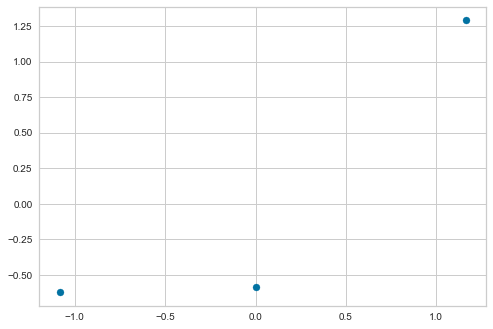

In [90]:
plt.scatter(kmeans_nor.cluster_centers_[:, 4], kmeans_nor.cluster_centers_[:, 6])

Text(0.5, 1.0, 'Clustering Class of seedType wiht normalized')

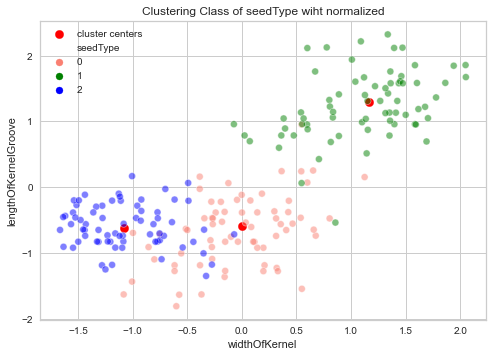

In [91]:
plt.scatter(kmeans_nor.cluster_centers_[:, 4], kmeans_nor.cluster_centers_[:, 6], c='red', marker='o', s=70, label='cluster centers')
#plt.legend(loc=4)
sns.scatterplot(data=normalized_df, x='widthOfKernel', y='lengthOfKernelGroove', 
                hue='seedType', alpha=0.5, palette = ['salmon', 'green', 'blue'])
plt.title('Clustering Class of seedType wiht normalized')

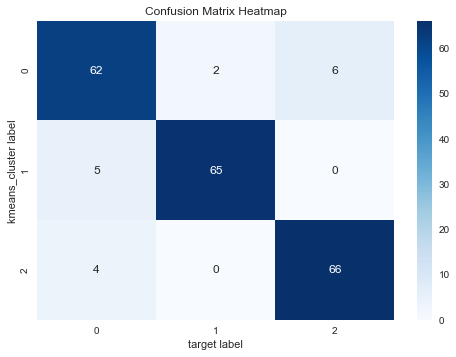

In [92]:
cm2 = confusion_matrix(target_nor, cluster_labels_nor)

ax = sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Heatmap')
plt.xlabel("target label")
plt.ylabel("kmeans_cluster label")
plt.show()

In [94]:
normalized_df['Cluster'] = cluster_labels_nor

In [96]:
normalized_df.style.apply(f, axis=0, subset=['Cluster'])

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType,Cluster
0,0.141759,0.214949,0.000060,0.303493,0.141364,-0.983801,-0.382663,0,0
1,0.011161,0.008204,0.427494,-0.168223,0.196962,-1.783904,-0.919816,0,0
2,-0.191609,-0.359342,1.438945,-0.761817,0.207552,-0.665888,-1.186357,0,0
3,-0.346264,-0.474200,1.036904,-0.687336,0.318747,-0.958528,-1.227051,0,0
4,0.444196,0.329807,1.371233,0.066507,0.803240,-1.559768,-0.474223,0,0
5,-0.160678,-0.267455,1.019976,-0.547401,0.141364,-0.823514,-0.919816,0,0
6,-0.054137,-0.053054,0.376710,-0.147910,0.001046,-0.075954,-0.384698,0,0
7,-0.253471,-0.351685,0.850695,-0.470662,0.114889,-0.665223,-0.830290,0,0
8,0.612598,0.689696,0.156645,0.958027,0.546432,-1.104182,0.954114,0,1
9,0.547299,0.528894,0.719503,0.576592,0.652332,-1.151404,0.254188,0,0


## Evaluate Model
จากนั้นทำการทดสอบโมเดลที่ได้

In [97]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(target, cluster_labels)
print ('Testing accuracy for the above clutering = ', purity*100)

Testing accuracy for the above clutering =  89.52380952380953


In [98]:
#from sklearn.metrics.classification import accuracy_score
#from coclust.evaluation.external import accuracy

In [99]:
#accuracy_score(target, cluster_labels)

In [100]:
purity2 = purity_score(target_nor, cluster_labels_nor)
print ('Testing accuracy for the above clutering = ', purity2*100)

Testing accuracy for the above clutering =  91.9047619047619
